<a href="https://colab.research.google.com/github/jericho0521/Body-Fat-Prediction/blob/main/bodyfat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Desmond516/PDS202207/main/telco_customer_churn_dataset.csv') #read csv
#This code imports in the two primary libraries we will make use of in our analysis.
#Pandas is a library that allows us to make use of DataFrames and specialized functions that help with data processing.
#Seaborn is a library that allows us to create data visualizations to better understand our dataset.

In [ ]:
df.head(20) #display the first 20 lines

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.iloc[:-1]  #display entire dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df.info() #display dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape  #display the shape of dataframe

(7043, 21)

In [ ]:
df.isnull().sum() #check for null or not null values for this dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns  #display all columns for dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe() #description for dataframe

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
pd.DataFrame(round(df.mean(),2,),columns=['Mean'])  #finding the mean for every columms

<ipython-input-10-352c6bc1c82b>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(round(df.mean(),2,),columns=['Mean'])  #finding the mean for every columms


,Mean
SeniorCitizen,0.16
tenure,32.37
MonthlyCharges,64.76


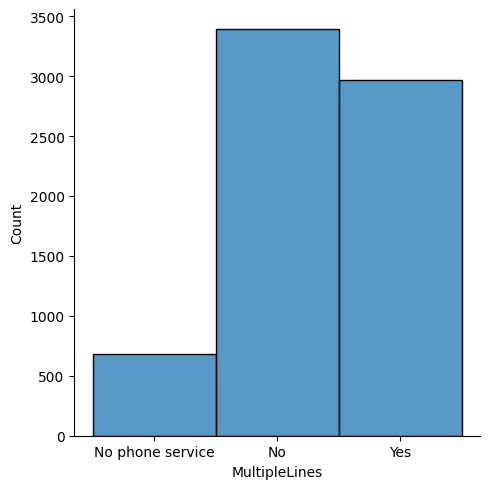

In [ ]:
sns.displot(df['MultipleLines'])  #display a histogram using seaborn

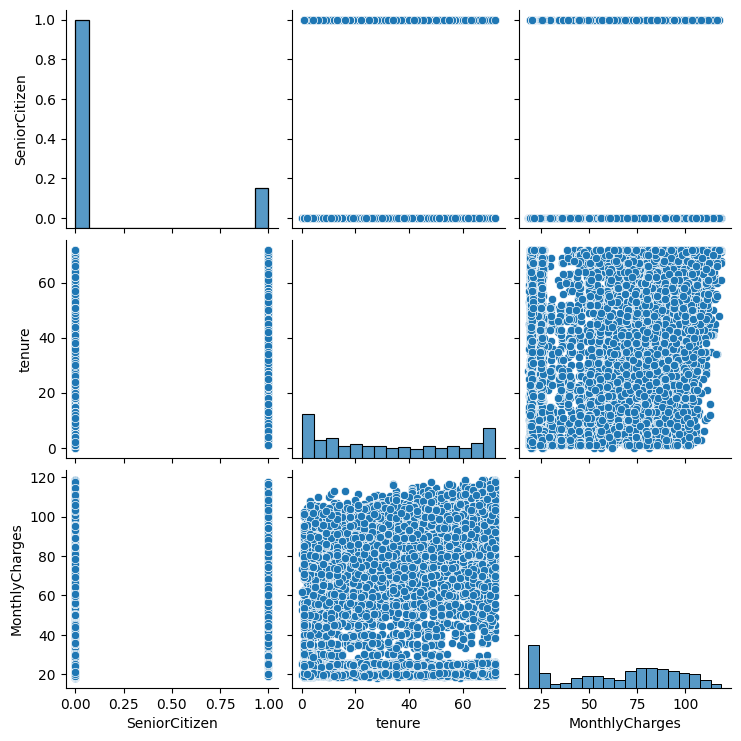

In [ ]:
sns.pairplot(df)  #plot pairwise relatinonships

<Axes: xlabel='Partner', ylabel='count'>

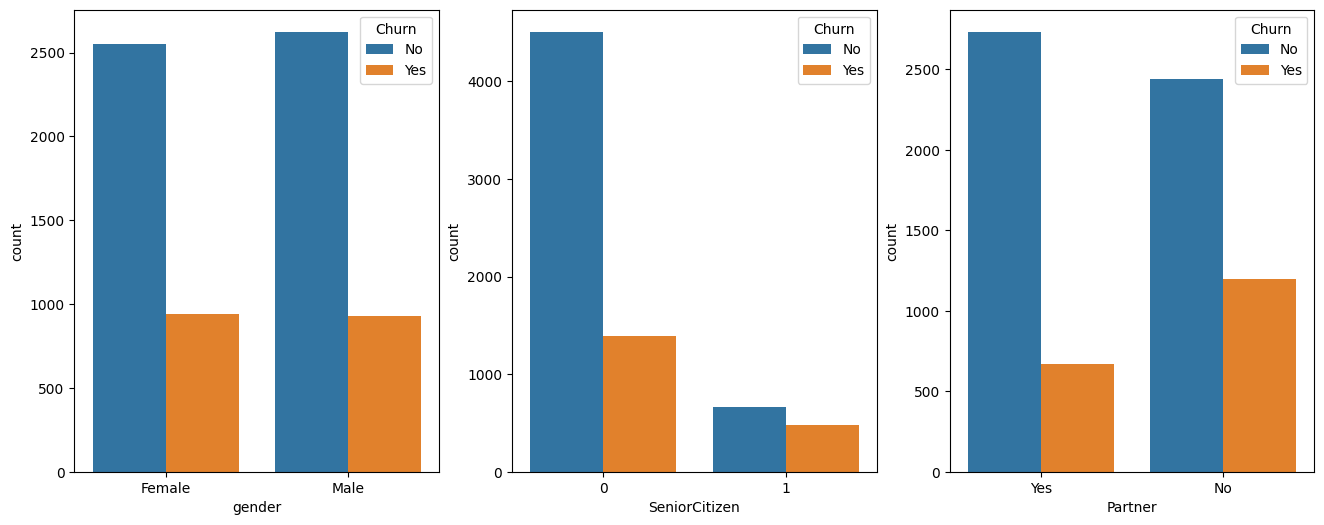

In [ ]:
from matplotlib import pyplot as plt

main, subplots = plt.subplots(1,3,figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

# we want to see the cor-relation between gender vs churn rate, does gender affect churn rate
# does senior citizen affect the churn rate ?
# does partener status affect the churn rate ?
# you can look at the chart below to get the answers for these questions
# we can see the relationshi between gender, senior citizen and partner with churn gender 0= female and gender 1 = male
# how many of them churn we have 7032 customers here, how many of the m male and female, how many of them churn.


<Axes: xlabel='DeviceProtection', ylabel='count'>

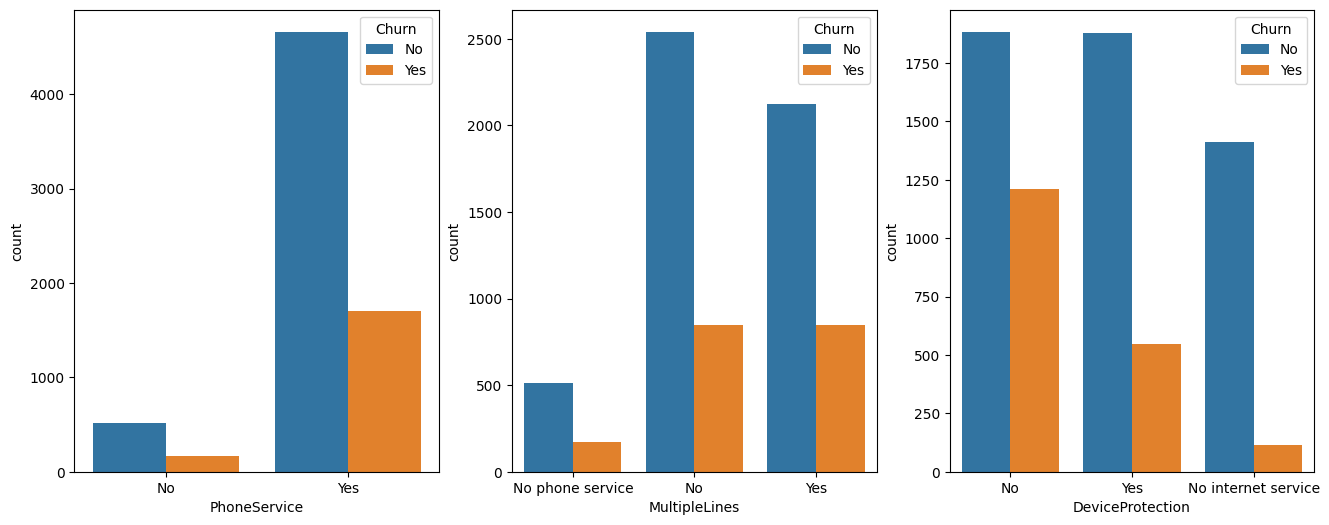

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

# phone service = 0 means what? phone service = 1 means what?
# means use data service only majority of the customers here use phone service =1
# more customer with phone service, churn more more customer without multiple line, churn more but customer with single line
# also catching up device protection = 0,
# means no insurance plan, customer without device protection plan churn more
# customer with on line security, on line backup and tech support plan churn less, why?
# maybe we can provide free plan
# 3 months
# 6 months
# to those customer who do not subscribe these plan
# as a strategy to keep them from churning

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<Axes: xlabel='PaperlessBilling', ylabel='count'>

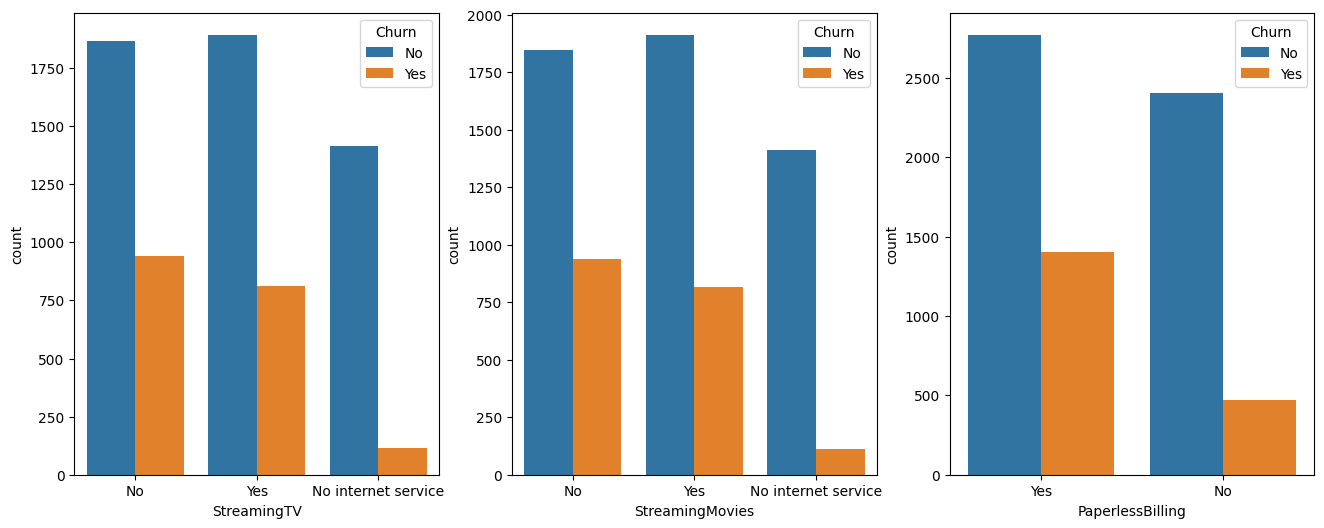

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

# customer with paperless billing churn more whereas customer with streaming tv and streaming movie is more about the same, why

In [ ]:
df.corr() #display correlation

<ipython-input-17-50bb6b1a954a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #display correlation


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<ipython-input-18-667b111a21f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')   #generate heatmap using the correlation above using cool to warm graphics and to show annotation


<Axes: >

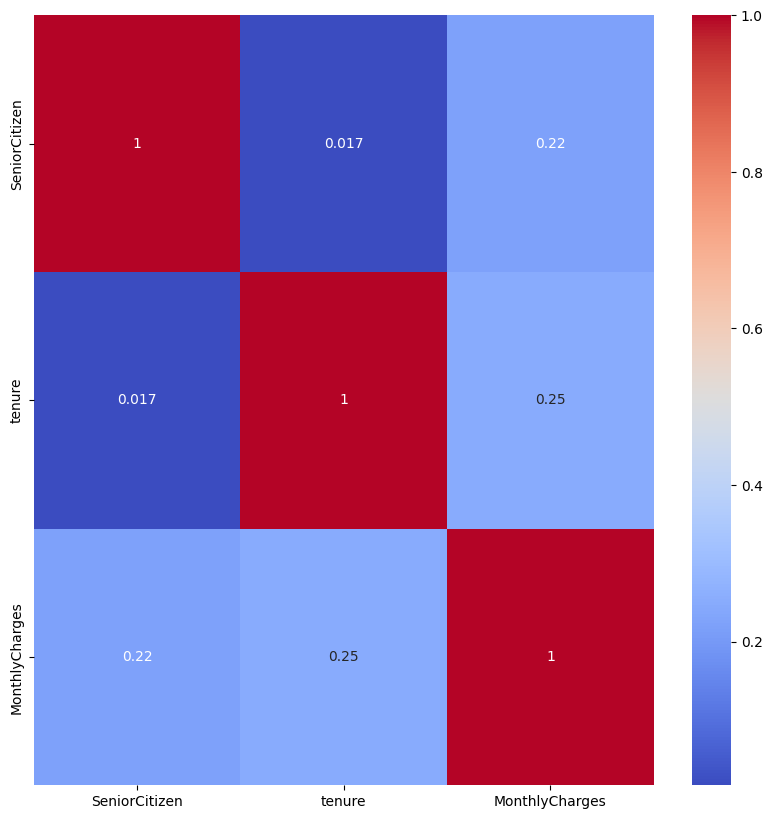

In [ ]:
plt.figure(figsize=(10,10)) #make size of chart to be 10x10 inches
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')   #generate heatmap using the correlation above using cool to warm graphics and to show annotation

In [ ]:
columns = ['SeniorCitizen','Partner','PhoneService','DeviceProtection','OnlineSecurity',
           'OnlineBackup','TechSupport','PaperlessBilling','tenure','MonthlyCharges','TotalCharges']

train_data = df[columns] #what are the factors that affect the churn decisions
train_labels = df['Churn'] #what you want the machine to predict,which column

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_data,train_labels,
                                                 test_size=0.3,random_state=1)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
#we evaluate the accuracy of the prediction,the machine will
#compared with the predicted vs actual value for churn

NameError: name 'y_pred' is not defined

In [ ]:
data = data_with_dummy[['Age','Weight','Height','BodyFat']] #define old variable to new variable with new data in order of age weight height and bodyfat
data.head() #show head

In [ ]:
x = data.iloc[:,:-1]  #define x to show until last column
y = data.iloc[:,-1] #define y to show only last column

In [ ]:
from sklearn.preprocessing import StandardScaler #import libraries
scaler = StandardScaler() #define scaler to standardscaler so that it standardizes the values
scaler.fit(x) #trains the model in x axis
x = scaler.transform(x) #transform based on the data of x
from sklearn.model_selection import train_test_split  #import libraries

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) #new variables assigned to get training and test sets
x_test  #print x_test

In [ ]:
import statsmodels.api as sm  #import library
x_train = sm.add_constant(x_train)  #add a constant colume of 1's to x_train
reg_model = sm.OLS(y_train, x_train).fit()  #fit an ordineary squares regression model to the training data

In [ ]:
x_test = sm.add_constant(x_test)  #test model
y_pred = reg_model.predict(x_test)  #predict outcome
predicted_test = pd.DataFrame({'Predicted Body Fat': y_pred, 'Actual Body Fat': y_test})  #create new dataframe with new data

In [ ]:
predicted_test.head(10) #prints new df

In [ ]:
predicted_test.head() #show new head

In [ ]:
plt.scatter(y_test,y_pred)  #generate scatter plot with y_text and y_predicted
plt.xlabel('Actual Body Fat', size=18)  #plot y axis with name actual body fat with size 18
plt.ylabel('Predicted Body Fat', size=18) #plot y axis with name predicted body fat with size 18
plt.show()  #show plot

In [ ]:
pred_actual = predicted_test[['Predicted Body Fat','Actual Body Fat']]  #assign new variable to new data set
pred_actual.corr()  #show correlation

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  #assign table to result with the data from y_test and y_pred with the names Actual and Predicted
result.head() #show head

In [ ]:
result_plot = result.head(30) #show first 30 results
result_plot.plot(kind='bar',figsize=(16,10))  #plot "result_plot" as a bar graph with the size of 16,10
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')  #make the grid with assigned attributes ie "major" "linewidth" "color"
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  #make the grid with assigned attributes
plt.show()  #show plot

In [ ]:
reg_model.summary() #shows summary of the model

In [ ]:
from scipy.stats import chi2_contingency  #import libraries

In [ ]:
chi_res = chi2_contingency(pd.crosstab(df['BodyFat'],df['Weight'])) #tuple containing chi-squared test statistic, p-value and degrees of freedom
                                                                    #creates tables that shows frequency counts of bodyfat and weight

print('For Weight: Chi2 Statistics: {} and p-value: {}'.format(chi_res[0],chi_res[1]))  #prints out values

In [ ]:
chi_res1 = chi2_contingency(pd.crosstab(df['BodyFat'],df['Height']))  #same as above, just different value

print('For Height: Chi2 Statistics: {} and p-value: {}'.format(chi_res1[0],chi_res1[1]))  #prints

In [ ]:
chi_res2 = chi2_contingency(pd.crosstab(df['BodyFat'],df['Density'])) #same as above.

print('For Age: Chi2 Statistics: {} and p-value: {}'.format(chi_res2[0],chi_res2[1])) #print.

In [ ]:
predicted_test['Residual'] = predicted_test['Actual Body Fat']  #adds new column 'residual' to the variable
predicted_test['Predicted Body Fat']  #creates new colum with 'predicted body fat'
predicted_test.head(5)  #diaplay first 5 rows of the dataframe

In [ ]:
predicted_test['%Diff'] = np.absolute(predicted_test['Residual'] / predicted_test['Actual Body Fat']) * 100 #calculates the percentange difference
predicted_test = np.around(predicted_test, 2) #round all the values in predicted_test
predicted_test.head() #diplay

In [ ]:
from sklearn.linear_model import LinearRegression #import libraries

In [ ]:
lr = LinearRegression() #assign lr to linearregression fusnction

In [ ]:
lr.fit(x_test, y_pred)  #puts x_test and y_preed in a linear regression model
print(lr.intercept_)  #prints it out

In [ ]:
X = df[['Density','BodyFat','Weight','Height']] #define new variables
y = df['Age'] #define new variables

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient']) #assign coeff_df to create table that shows the coefficient for the table
coeff_df  #show coefficient

The resulting coefficients from the linear regression model are as follows:



*   The coefficient for Density is 0.000000, which indicates that this feature does not have a significant impact on the target variable (i.e., it is not weighted heavily in the linear regression model).
*   The coefficient for BodyFat is 2.062140, which means that a one-unit increase in BodyFat is associated with a 2.062140 unit increase in the target variable, holding all other variables constant.
*   The coefficient for Weight is 6.270182, which means that a one-unit increase in Weight is associated with a 6.270182 unit increase in the target variable, holding all other variables constant.
*   The coefficient for Height is -1.888885, which means that a one-unit increase in Height is associated with a -1.888885 unit decrease in the target variable, holding all other variables constant.










In [ ]:
import pickle #import package pickle

In [ ]:
filename = 'reg_model_save.sav' #assign filename

In [ ]:
pickle.dump(reg_model, open(filename,'wb')) #